### BUSINESS UNDERSTANDING
With the growing trend of major companies investing in the movie industry, the client is interested in starting his own movie studio. However, without prior experience in the field, the client needs data-driven strategies. The task at hand is to analyze current box office trends and identify which types of films are performing best. Having accurate revenue forecasts, genre performances, and other characteristics of films will assist in prioritizing for maximum success and profitability in the highly competitive entertainment market. 
Without this data, the company may struggle to effectively identify the most profitable genres, budgets, or release windows, and determine which genres resonate best with local and foreign audiences.

#### BUSINESS OBJECTIVES
To help the client make a strategic decision on launching this new endeavor, it is essential to address several key questions that will shape our analysis. The primary objectives of this analysis are to answer the following:

1. Which genre performs the best at the box office?
2. Which studios are the top performing based on revenue?
3. What role does the foreign market play in the industry's overall performance?
4. What impact does the budget have on movie performance?
5. What is the optimal time of year to release a movie for maximum success?
6. Do certain languages have a broader audience reach?
7. Who are the top-performing directors and writers in the industry? 

#### SUCCESS CRITERIA



### DATA UNDERSTANDING
The data for this analysis was sourced from various movie platforms, including 'The Numbers,' 'Rotten Tomatoes,' 'TMDB Movies,' 'Bom Movies,' and an 'IMDB' database.

In [215]:
#importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
from matplotlib.ticker import ScalarFormatter
import scipy.stats as stats
import sqlite3
import requests


In [216]:
#loading data

tnbudgets_df = pd.read_csv('tn.movie_budgets.csv')
tmdb_df = pd.read_csv('tmdb.movies.csv')
rtinfo = pd.read_csv('rt.movie_info.tsv', sep = '\t', skiprows=lambda x: x == 1378)
bom_movies= pd.read_csv('bom.movie_gross.csv')
conn = sqlite3.connect('im.db')
pd.read_sql("""SELECT *
            FROM sqlite_master""",conn)

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


In [217]:
#fetching data from tmdb website to relate genre IDs with the genre names

# Defining my  API key after creating it by creating an account in TMDB
api_key = "0135236f1aaceb14241d05ec5221485b"  
# Getting the genre list from the TMDb API
url = f"https://api.themoviedb.org/3/genre/movie/list?api_key={api_key}&language=en-US"
response = requests.get(url)
if response.status_code == 200:
    genre_data = response.json()['genres']
    # Creating  a dictionary mapping genre_ids to genre names
    genre_dict = {genre['id']: genre['name'] for genre in genre_data}
    print("Genre Dictionary:", genre_dict)
else:
    print(f"Failed to fetch genres. Status Code: {response.status_code}")

Genre Dictionary: {28: 'Action', 12: 'Adventure', 16: 'Animation', 35: 'Comedy', 80: 'Crime', 99: 'Documentary', 18: 'Drama', 10751: 'Family', 14: 'Fantasy', 36: 'History', 27: 'Horror', 10402: 'Music', 9648: 'Mystery', 10749: 'Romance', 878: 'Science Fiction', 10770: 'TV Movie', 53: 'Thriller', 10752: 'War', 37: 'Western'}


In [218]:
#viewing the top 5 rows

tnbudgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [219]:
tmdb_df.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [220]:
rtinfo.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [221]:
bom_movies.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [222]:
#more information on the data

tnbudgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [223]:
tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [224]:
rtinfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1559 entries, 0 to 1558
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1559 non-null   int64 
 1   synopsis      1497 non-null   object
 2   rating        1556 non-null   object
 3   genre         1551 non-null   object
 4   director      1360 non-null   object
 5   writer        1110 non-null   object
 6   theater_date  1200 non-null   object
 7   dvd_date      1200 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1529 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.3+ KB


In [225]:
bom_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


##### imdb database

In [226]:
persons = pd.read_sql("""SELECT * FROM persons""",conn)
persons.isna().sum()

person_id                  0
primary_name               0
birth_year            523912
death_year            599865
primary_profession     51340
dtype: int64

In [227]:
movie_ratings = pd.read_sql("""SELECT * FROM movie_ratings""",conn)
movie_ratings.isna().sum()

movie_id         0
averagerating    0
numvotes         0
dtype: int64

In [228]:
directors = pd.read_sql("""
SELECT *
                        FROM directors""",conn)
directors.isna().sum()

movie_id     0
person_id    0
dtype: int64

In [229]:
movie_basics = pd.read_sql("""
SELECT *
                            FROM movie_basics""",conn)
movie_basics.isna().sum()

len(movie_basics)

146144

From the above we can note that tmdb and tnbudgets datasets do not have any missing values. Also, some of the data are numerical but are categorised as objects.

### DATA PREPARATION AND DATA CLEANING

##### tnbudgets dataset

In [230]:
#changing all the currency values from objects to float

currency_cols = ['production_budget','domestic_gross','worldwide_gross']
for x in currency_cols:
    tnbudgets_df[x] = tnbudgets_df[x].astype(str).replace({'\$':'',',':''},regex = True)
    tnbudgets_df[x] = tnbudgets_df[x].astype(float)
    tnbudgets_df[x] = tnbudgets_df[x].round(0).astype(int)
tnbudgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,-2147483648
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [231]:
#check for duplicates

tnbudgets_df.duplicated().sum()

0

There are no duplicated entries

In [232]:
#dropping rows where worlwide gross revenue is 0 as they are not helpful in this analysis. 

tnbudgets_df = tnbudgets_df[tnbudgets_df['worldwide_gross'] != 0]
tnbudgets_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,-2147483648
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...,...,...
5775,76,"May 26, 2006",Cavite,7000,70071,71644
5776,77,"Dec 31, 2004",The Mongol King,7000,900,900
5778,79,"Apr 2, 1999",Following,6000,48482,240495
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338


In [233]:
#dropping the id column because it is also not helpful in this analysis

tnbudgets_df = tnbudgets_df.drop('id', axis = 1)

In [234]:
#converting month and date into datetime

tnbudgets_df['release_date'] = pd.to_datetime(tnbudgets_df['release_date'])
tnbudgets_df

,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,2009-12-18,Avatar,425000000,760507625,-2147483648
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,2019-06-07,Dark Phoenix,350000000,42762350,149762350
3,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963
4,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...,...
5775,2006-05-26,Cavite,7000,70071,71644
5776,2004-12-31,The Mongol King,7000,900,900
5778,1999-04-02,Following,6000,48482,240495
5779,2005-07-13,Return to the Land of Wonders,5000,1338,1338


In [235]:
#extracting months and years from the release date

tnbudgets_df['month'] = tnbudgets_df['release_date'].dt.month
tnbudgets_df['year'] = tnbudgets_df['release_date'].dt.year
tnbudgets_df

,release_date,movie,production_budget,domestic_gross,worldwide_gross,month,year
0,2009-12-18,Avatar,425000000,760507625,-2147483648,12,2009
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,5,2011
2,2019-06-07,Dark Phoenix,350000000,42762350,149762350,6,2019
3,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,5,2015
4,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,12,2017
...,...,...,...,...,...,...,...
5775,2006-05-26,Cavite,7000,70071,71644,5,2006
5776,2004-12-31,The Mongol King,7000,900,900,12,2004
5778,1999-04-02,Following,6000,48482,240495,4,1999
5779,2005-07-13,Return to the Land of Wonders,5000,1338,1338,7,2005


In [236]:
#calculating the profit made by each movie

tnbudgets_df['profit'] = (tnbudgets_df['worldwide_gross'] - tnbudgets_df['production_budget']).astype(int)
tnbudgets_df

,release_date,movie,production_budget,domestic_gross,worldwide_gross,month,year,profit
0,2009-12-18,Avatar,425000000,760507625,-2147483648,12,2009,1722483648
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,5,2011,635063875
2,2019-06-07,Dark Phoenix,350000000,42762350,149762350,6,2019,-200237650
3,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,5,2015,1072413963
4,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,12,2017,999721747
...,...,...,...,...,...,...,...,...
5775,2006-05-26,Cavite,7000,70071,71644,5,2006,64644
5776,2004-12-31,The Mongol King,7000,900,900,12,2004,-6100
5778,1999-04-02,Following,6000,48482,240495,4,1999,234495
5779,2005-07-13,Return to the Land of Wonders,5000,1338,1338,7,2005,-3662


In [237]:
#adding column for foreign  from tnbudgets

tnbudgets_df['foreign_gross'] = tnbudgets_df['worldwide_gross'] - tnbudgets_df['domestic_gross']
tnbudgets_df

,release_date,movie,production_budget,domestic_gross,worldwide_gross,month,year,profit,foreign_gross
0,2009-12-18,Avatar,425000000,760507625,-2147483648,12,2009,1722483648,1386976023
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,5,2011,635063875,804600000
2,2019-06-07,Dark Phoenix,350000000,42762350,149762350,6,2019,-200237650,107000000
3,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,5,2015,1072413963,944008095
4,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,12,2017,999721747,696540365
...,...,...,...,...,...,...,...,...,...
5775,2006-05-26,Cavite,7000,70071,71644,5,2006,64644,1573
5776,2004-12-31,The Mongol King,7000,900,900,12,2004,-6100,0
5778,1999-04-02,Following,6000,48482,240495,4,1999,234495,192013
5779,2005-07-13,Return to the Land of Wonders,5000,1338,1338,7,2005,-3662,0


In [238]:
#checking for outliers based on the profit

Q1 = tnbudgets_df['profit'].quantile(0.25)  
Q3 = tnbudgets_df['profit'].quantile(0.75)  
IQR = Q3 - Q1  

#outlier range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#outliers
outliers = tnbudgets_df[(tnbudgets_df['profit'] < lower_bound) | (tnbudgets_df['profit'] > upper_bound)]
outliers

,release_date,movie,production_budget,domestic_gross,worldwide_gross,month,year,profit,foreign_gross
0,2009-12-18,Avatar,425000000,760507625,-2147483648,12,2009,1722483648,1386976023
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,5,2011,635063875,804600000
2,2019-06-07,Dark Phoenix,350000000,42762350,149762350,6,2019,-200237650,107000000
3,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,5,2015,1072413963,944008095
4,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,12,2017,999721747,696540365
...,...,...,...,...,...,...,...,...,...
5117,1937-12-21,Snow White and the Seven Dwarfs,1488000,184925486,184925486,12,1937,183437486,0
5210,1976-11-21,Rocky,1000000,117235147,225000000,11,1976,224000000,107764853
5346,1942-08-13,Bambi,858000,102797000,268000000,8,1942,267142000,165203000
5406,1999-07-14,The Blair Witch Project,600000,140539099,248300000,7,1999,247700000,107760901


In [239]:
#dropping outliers because they represent one off situations where a movie did really well or very poorly

tnbudgets_dfclean = tnbudgets_df[(tnbudgets_df['profit'] >= lower_bound) & (tnbudgets_df['profit'] <= upper_bound)]
tnbudgets_dfclean

,release_date,movie,production_budget,domestic_gross,worldwide_gross,month,year,profit,foreign_gross
11,2018-05-25,Solo: A Star Wars Story,275000000,213767512,393151347,5,2018,118151347,179383835
12,2013-07-02,The Lone Ranger,275000000,89302115,260002115,7,2013,-14997885,170700000
13,2012-03-09,John Carter,275000000,73058679,282778100,3,2012,7778100,209719421
23,2006-06-28,Superman Returns,232000000,200120000,374085065,6,2006,142085065,173965065
31,2012-05-18,Battleship,220000000,65233400,313477717,5,2012,93477717,248244317
...,...,...,...,...,...,...,...,...,...
5775,2006-05-26,Cavite,7000,70071,71644,5,2006,64644,1573
5776,2004-12-31,The Mongol King,7000,900,900,12,2004,-6100,0
5778,1999-04-02,Following,6000,48482,240495,4,1999,234495,192013
5779,2005-07-13,Return to the Land of Wonders,5000,1338,1338,7,2005,-3662,0


##### tmdb dataset

In [240]:
# Checking the top 10 most popular moives
most_popular = tmdb_df.nlargest(10, 'popularity')
print(most_popular[['title','popularity']])

                                             title  popularity
23811                       Avengers: Infinity War      80.773
11019                                    John Wick      78.123
23812            Spider-Man: Into the Spider-Verse      60.534
11020    The Hobbit: The Battle of the Five Armies      53.783
5179                                  The Avengers      50.289
11021                      Guardians of the Galaxy      49.606
20617                            Blade Runner 2049      48.571
23813                            Blade Runner 2049      48.571
23814  Fantastic Beasts: The Crimes of Grindelwald      48.508
23815                    Ralph Breaks the Internet      48.057


In [241]:
#checking whether the Blade Runner movie 2049 has the same information that is in popularity,vote count and average
blade_runner_info = tmdb_df[tmdb_df['title'] == 'Blade Runner 2049']
print(blade_runner_info)

       Unnamed: 0      genre_ids      id original_language     original_title  \
20617       20617  [878, 28, 53]  335984                en  Blade Runner 2049   
23813       23813  [878, 28, 53]  335984                en  Blade Runner 2049   

       popularity release_date              title  vote_average  vote_count  
20617      48.571   2017-10-06  Blade Runner 2049           7.4        6679  
23813      48.571   2017-10-06  Blade Runner 2049           7.4        6679  


In [242]:
#decided to  Group the data by title,release date and how many times it has appeared
title_release_counts = tmdb_df.groupby(['title', 'release_date']).size()

# Filtered the data for titles that appear more than once
duplicates_titles = title_release_counts[title_release_counts > 1]

print(duplicates_titles)


title                                           release_date
$ellebrity                                      2013-01-11      2
'85: The Greatest Team in Pro Football History  2018-01-29      2
1 Night                                         2017-02-10      2
10,000 km                                       2015-07-10      2
100 Streets                                     2016-06-08      2
                                                               ..
Your Name.                                      2017-04-07      2
Youth in Oregon                                 2017-02-03      2
Zama                                            2017-09-30      2
Zarafa                                          2012-11-11      2
Zoo                                             2018-06-08      2
Length: 1002, dtype: int64


In [243]:
# Droped duplicates so that i can only remain with title
tmdb_df.drop_duplicates(subset=['title', 'release_date'], keep='first', inplace=True)
print(tmdb_df)

       Unnamed: 0            genre_ids      id original_language  \
0               0      [12, 14, 10751]   12444                en   
1               1  [14, 12, 16, 10751]   10191                en   
2               2        [12, 28, 878]   10138                en   
3               3      [16, 35, 10751]     862                en   
4               4        [28, 878, 12]   27205                en   
...           ...                  ...     ...               ...   
26512       26512             [27, 18]  488143                en   
26513       26513             [18, 53]  485975                en   
26514       26514         [14, 28, 12]  381231                en   
26515       26515      [10751, 12, 28]  366854                en   
26516       26516             [53, 27]  309885                en   

                                     original_title  popularity release_date  \
0      Harry Potter and the Deathly Hallows: Part 1      33.533   2010-11-19   
1                      

In [244]:
# Checking whether there are remaining duplicates after dropping
remaining_duplicates = tmdb_df[tmdb_df.duplicated(subset=['title', 'release_date'], keep=False)]
print(remaining_duplicates)


Empty DataFrame
Columns: [Unnamed: 0, genre_ids, id, original_language, original_title, popularity, release_date, title, vote_average, vote_count]
Index: []


In [245]:
# dropping the unnamed and original title column as it dim it irrelevant 
tmdb_df.drop(columns=['Unnamed: 0','original_title'], inplace=True)

In [246]:
# here i needed to use ast.literal_eval() to convert the genre id into an actual list,so that i can work with it easily.
import ast
# this Converts the string representation of lists to actual lists
tmdb_df['genre_ids'] = tmdb_df['genre_ids'].apply(ast.literal_eval)
# this gets the total number of unique genre IDs
genres = tmdb_df['genre_ids'].explode()
unique_genres = genres.unique()
num_unique_genres = len(unique_genres)

print("genre ids:", num_unique_genres)
print("Unique genre ids:", unique_genres)

genre ids: 20
Unique genre ids: [12 14 10751 16 28 878 35 53 27 80 18 10749 10402 9648 36 37 10770 10752
 99 nan]


In [247]:
# Handling the nans on the genre ids column
# Checking for the empty lists in genre_ids 
empty_lists = tmdb_df[tmdb_df['genre_ids'].apply(lambda x: isinstance(x, list) and len(x) == 0)]
# Checking for empty list and 'nan'  as strings in genre_ids
nan_strings = tmdb_df[tmdb_df['genre_ids'] == 'nan']
print("Rows with empty lists in genre_ids:")
print(empty_lists)
print("\nRows with 'nan' as a string in genre_ids:")
print(nan_strings)

Rows with empty lists in genre_ids:
      genre_ids      id original_language  popularity release_date  \
517          []   31059                ru       3.867   2010-01-21   
559          []  151316                en       3.424   2010-12-07   
589          []   75828                en       3.154   2010-09-16   
689          []  150782                en       2.625   2010-01-18   
731          []  200946                en       2.451   2010-10-24   
...         ...     ...               ...         ...          ...   
26495        []  556601                en       0.600   2018-08-28   
26497        []  514045                en       0.600   2018-02-14   
26498        []  497839                en       0.600   2018-01-11   
26500        []  561932                en       0.600   2018-02-04   
26506        []  561861                en       0.600   2018-11-25   

                                        title  vote_average  vote_count  
517                Nasha Russia: Yaytsa sudby    

In [248]:
# Check for empty lists in genre_ids
empty_lists = tmdb_df[tmdb_df['genre_ids'].apply(lambda x: isinstance(x, list) and len(x) == 0)]
print("Rows with empty lists in genre_ids:", empty_lists.shape[0])

Rows with empty lists in genre_ids: 2459


In [249]:
# Storing the original DataFrame before cleaning
original_tmdb_df = tmdb_df.copy()

# Droping rows where 'genre_ids' is an empty list
tmdb_df = tmdb_df[~tmdb_df['genre_ids'].apply(lambda x: isinstance(x, list) and len(x) == 0)]

# Printing the cleaned DataFrame
print(f"Before cleaning: {original_tmdb_df.shape}")
print(f"After cleaning: {tmdb_df.shape}")
print(tmdb_df.head())

Before cleaning: (25490, 8)
After cleaning: (23031, 8)
             genre_ids     id original_language  popularity release_date  \
0      [12, 14, 10751]  12444                en      33.533   2010-11-19   
1  [14, 12, 16, 10751]  10191                en      28.734   2010-03-26   
2        [12, 28, 878]  10138                en      28.515   2010-05-07   
3      [16, 35, 10751]    862                en      28.005   1995-11-22   
4        [28, 878, 12]  27205                en      27.920   2010-07-16   

                                          title  vote_average  vote_count  
0  Harry Potter and the Deathly Hallows: Part 1           7.7       10788  
1                      How to Train Your Dragon           7.7        7610  
2                                    Iron Man 2           6.8       12368  
3                                     Toy Story           7.9       10174  
4                                     Inception           8.3       22186  


In [250]:
# Applying the mapping function using lambda
tmdb_df['genre_names'] = tmdb_df['genre_ids'].apply(lambda genre_ids: [genre_dict.get(genre_id, 'Unknown') for genre_id in genre_ids])

# Printing the DataFrame with the genre names
print(tmdb_df[['title', 'genre_ids', 'genre_names']].head())

                                          title            genre_ids  \
0  Harry Potter and the Deathly Hallows: Part 1      [12, 14, 10751]   
1                      How to Train Your Dragon  [14, 12, 16, 10751]   
2                                    Iron Man 2        [12, 28, 878]   
3                                     Toy Story      [16, 35, 10751]   
4                                     Inception        [28, 878, 12]   

                               genre_names  
0             [Adventure, Fantasy, Family]  
1  [Fantasy, Adventure, Animation, Family]  
2     [Adventure, Action, Science Fiction]  
3              [Animation, Comedy, Family]  
4     [Action, Science Fiction, Adventure]  


##### rtinfo dataset

In [251]:
# checking missing values
rtinfo.isnull().sum()

id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1219
box_office      1219
runtime           30
studio          1065
dtype: int64

In [252]:
#checking duplicates
rtinfo.duplicated().sum()

0

In [253]:
# checking the unique value for the currency and box office
rtinfo['currency'].unique()

array([nan, '$'], dtype=object)

In [254]:
# creating a function that finds matching missing rows
def find_matching_missing_rows(df, col1, col2):

    missing_col1 = pd.isna(df[col1])
    missing_col2 = pd.isna(df[col2])
    matching_missing_positions = missing_col1 & missing_col2
    matching_missing_rows = df[matching_missing_positions]
    return matching_missing_rows

In [255]:
# finding and dropping null vakues in the currency and box_office columns
rtinfo1 = rtinfo
missing_row =find_matching_missing_rows(rtinfo1,'currency','box_office')
rtinfo1 = rtinfo1.dropna(subset=['currency'])
rtinfo1 = rtinfo1.dropna(subset=['box_office'])
rtinfo1.isnull().sum()

id               0
synopsis         0
rating           0
genre            0
director        41
writer          67
theater_date     6
dvd_date         6
currency         0
box_office       0
runtime          2
studio          35
dtype: int64

In [256]:
#changing the box_office column to numeric from object datatype, by first removig the `,`
rtinfo1['box_office'] = rtinfo1['box_office'].replace({',': ''}, regex=True)
rtinfo1['box_office'] = pd.to_numeric(rtinfo1['box_office'], errors='coerce')

We checked if the rows for currency columns and box_office columns the missing value were the same,and it turn out they were the same. So i dropped the rows. i have done this by creating a function that checks the similarities between the 2 columns missing value and returns their location.

In [257]:
# checking the unique value for rating
rtinfo1['rating'].unique()

array(['R', 'PG-13', 'PG', 'NR', 'G', 'NC17'], dtype=object)

In [258]:
# checking the unique value for genre
rtinfo1['genre'].unique()

array(['Drama|Science Fiction and Fantasy', 'Comedy', 'Drama',
       'Comedy|Drama|Mystery and Suspense',
       'Action and Adventure|Drama|Science Fiction and Fantasy',
       'Art House and International|Comedy|Drama|Musical and Performing Arts',
       'Action and Adventure|Drama|Horror|Mystery and Suspense',
       'Comedy|Kids and Family|Romance', 'Mystery and Suspense',
       'Action and Adventure|Mystery and Suspense', 'Comedy|Drama',
       'Art House and International|Drama|Musical and Performing Arts',
       'Drama|Sports and Fitness', 'Comedy|Romance',
       'Comedy|Drama|Kids and Family',
       'Action and Adventure|Science Fiction and Fantasy',
       'Horror|Mystery and Suspense', 'Comedy|Kids and Family',
       'Action and Adventure|Drama',
       'Action and Adventure|Comedy|Kids and Family', 'Drama|Romance',
       'Drama|Musical and Performing Arts',
       'Drama|Horror|Mystery and Suspense|Romance',
       'Comedy|Drama|Musical and Performing Arts',
       'A

In [259]:
# replacing of categories for rating to only 4 categories
rtinfo1['rating'] = rtinfo1['rating'].replace('PG-13', 'PG')
rtinfo1['rating'] = rtinfo1['rating'].replace('NC17', 'R')

In [260]:
rtinfo1['rating'].unique()

array(['R', 'PG', 'NR', 'G'], dtype=object)

In [261]:
# checking the unique value for currency
rtinfo1['currency'].unique()

array(['$'], dtype=object)

In [262]:
rtinfo2 = rtinfo1

We created a new data frame named genre_revenue, where it contains only the genre and the box office revenue. so first i have splitted the genre for each move and i have share the revenue for each move to the different category of genre it contain. then i have summed the box office revenue for each genre type.

In [263]:
rtinfo2['genre'] = rtinfo2['genre'].str.split('|')

rtinfo2= rtinfo2.explode('genre')

genre_revenue = rtinfo2.groupby('genre')['box_office'].sum().reset_index()
genre_revenue = genre_revenue.sort_values(by='box_office', ascending=False)

In [264]:
rtinfo2.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,600000,108 minutes,Entertainment One
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,600000,108 minutes,Entertainment One
6,10,Some cast and crew from NBC's highly acclaimed...,PG,Comedy,Jake Kasdan,Mike White,"Jan 11, 2002","Jun 18, 2002",$,41032915,82 minutes,Paramount Pictures
7,13,"Stewart Kane, an Irishman living in the Austra...",R,Drama,Ray Lawrence,Raymond Carver|Beatrix Christian,"Apr 27, 2006","Oct 2, 2007",$,224114,123 minutes,Sony Pictures Classics
8,14,"""Love Ranch"" is a bittersweet love story that ...",R,Drama,Taylor Hackford,Mark Jacobson,"Jun 30, 2010","Nov 9, 2010",$,134904,117 minutes,NaN


In [265]:
#i am changing the runtime column to numeric one by eliminating the minute text
rtinfo2 = rtinfo2.dropna(subset=['runtime'])
rtinfo2['runtime'] = rtinfo2['runtime'].str.extract(r'(\d+)').astype(int)

In [266]:
#i am removing the nan value from studio
rtinfo2 = rtinfo2.dropna(subset=['studio'])

In [267]:
rtinfo2['genre'].unique()

array(['Drama', 'Science Fiction and Fantasy', 'Comedy',
       'Mystery and Suspense', 'Action and Adventure',
       'Art House and International', 'Musical and Performing Arts',
       'Horror', 'Kids and Family', 'Romance', 'Sports and Fitness',
       'Western', 'Documentary', 'Special Interest', 'Animation',
       'Cult Movies', 'Classics', 'Faith and Spirituality', 'Television'],
      dtype=object)

In [268]:
#changing the box_office column to numeric one
genre_revenue['box_office'] = pd.to_numeric(genre_revenue['box_office'])
print(genre_revenue.dtypes)

genre         object
box_office     int64
dtype: object


In [269]:
#splitting the threatre date into month and year column. for better readability
rtinfo2['theater_date'] = pd.to_datetime(rtinfo2['theater_date'])
rtinfo2['Theatre_Year'] = rtinfo2['theater_date'].dt.year
rtinfo2['Theatre_Month'] = rtinfo2['theater_date'].dt.month_name()

##### bom movie dataset

In [270]:
#Count number of missing value
bom_movies.isnull().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [271]:
#Dropping the missing values and confirming that the dataframe has no missing values
bom_movies = bom_movies.dropna()
bom_movies.isnull().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

In [272]:
bom_movies.shape

(2007, 5)

In [273]:
#Check for duplicated values
bom_movies.duplicated().sum()

0

In [274]:
#Converting foreign_gross to numeric values, forcing errors to Nan
bom_movies['foreign_gross'] = pd.to_numeric(bom_movies['foreign_gross'], errors='coerce')

In [275]:
#Adding a new column of total_gross
bom_movies['total_gross'] = bom_movies['domestic_gross'] + bom_movies['foreign_gross']
bom_movies.head(10)

,title,studio,domestic_gross,foreign_gross,year,total_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08
5,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000.0,2010,6.985000e+08
6,Iron Man 2,Par.,312400000.0,311500000.0,2010,6.239000e+08
7,Tangled,BV,200800000.0,391000000.0,2010,5.918000e+08
8,Despicable Me,Uni.,251500000.0,291600000.0,2010,5.431000e+08
9,How to Train Your Dragon,P/DW,217600000.0,277300000.0,2010,4.949000e+08


In [276]:
#Setting the index to be studio
bom_movies = bom_movies.set_index('studio')
bom_movies.head()

,title,domestic_gross,foreign_gross,year,total_gross
studio,,,,,
BV,Toy Story 3,415000000.0,652000000.0,2010,1.067000e+09
BV,Alice in Wonderland (2010),334200000.0,691300000.0,2010,1.025500e+09
WB,Harry Potter and the Deathly Hallows Part 1,296000000.0,664300000.0,2010,9.603000e+08
WB,Inception,292600000.0,535700000.0,2010,8.283000e+08
P/DW,Shrek Forever After,238700000.0,513900000.0,2010,7.526000e+08


##### imdb database


In [277]:
# We shall merge the movie_basics and movie ratings tables.
moviename_ratings_df = pd.merge(left=movie_basics, right=movie_ratings, how='left', left_on='movie_id', right_on='movie_id')

# We shall merge the moviename_ratings to the directors as we are interested in working with specific directors.
mr_directors_df = pd.merge(left=moviename_ratings_df, right=directors, how='left', left_on='movie_id', right_on='movie_id')

# We shall merge the mr_directors with persons table to get the names.
movie_dir_df =pd.merge(left=mr_directors_df, right=persons, how='left', left_on='person_id', right_on='person_id')

# We shall rename the data frame to final for ease of use.
final_df = movie_dir_df
final_df.head()


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,person_id,primary_name,birth_year,death_year,primary_profession
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0,nm0712540,Harnam Singh Rawail,1921.0,2004.0,"director,writer,producer"
1,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0,nm0712540,Harnam Singh Rawail,1921.0,2004.0,"director,writer,producer"
2,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0,nm0712540,Harnam Singh Rawail,1921.0,2004.0,"director,writer,producer"
3,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0,nm0712540,Harnam Singh Rawail,1921.0,2004.0,"director,writer,producer"
4,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0,nm0002411,Mani Kaul,1944.0,2011.0,"director,writer,actor"


In [278]:
# checking null values
final_df.isna().sum()

movie_id                   0
primary_title              0
original_title            22
start_year                 0
runtime_minutes        55767
genres                  8790
averagerating         114760
numvotes              114760
person_id               5727
primary_name            5730
birth_year            228293
death_year            295163
primary_profession      6714
dtype: int64

In [279]:
# dropping data

# We shall drop the Original title column .
final_df.drop(columns=['original_title'], inplace=True)

# We shall drop  primary profession, as well
final_df.drop(columns=['primary_profession'], inplace=True)

# We shall drop the rows with no primary name as we dont have a director for the film.
final_df = final_df[final_df['primary_name'].notna()]

# We shall drop films with missing genres
final_df = final_df[final_df['genres'].notna()]

# We shall keep films from 2010 onwards
final_df = final_df[final_df['start_year']>=2009]

# We shall drop off the birth year and death year columns.
final_df = final_df.drop('death_year',axis = 1)
final_df = final_df.drop('birth_year', axis = 1)




len(final_df)

284612

In [280]:
#check for duplicated values 

final_df.duplicated().sum()
final_df.drop_duplicates(inplace=True)

#check for missing values again
final_df.isna().sum()

movie_id               0
primary_title          0
start_year             0
runtime_minutes    30899
genres                 0
averagerating      74557
numvotes           74557
person_id              0
primary_name           0
dtype: int64

In [281]:
# Let's check the stats for runtimes to decide what value to place in the empty cells
final_df['runtime_minutes'].describe()

count    128890.000000
mean         86.825541
std         223.682778
min           1.000000
25%          70.000000
50%          87.000000
75%          99.000000
max       51420.000000
Name: runtime_minutes, dtype: float64

About 90 to 110 minutes
Movies, too, have been reshaped by their technology, but in different ways than music. Movie length used to be limited to the size of a film reel, which plays about 11 minutes of footage. The standard length of a film is still, to this day, nine reels, or about 90 to 110 minutes long

Source : Vox

We shall set the missing values for runtime the mean time.

In [282]:
final_df['runtime_minutes'].fillna(final_df['runtime_minutes'].mean(),inplace=True)

In [283]:
#check for missing values once again
final_df.isna().sum()

movie_id               0
primary_title          0
start_year             0
runtime_minutes        0
genres                 0
averagerating      74557
numvotes           74557
person_id              0
primary_name           0
dtype: int64

In [284]:
# Let's check the stats for average rating 
final_df['averagerating'].describe()

count    85232.000000
mean         6.338266
std          1.475051
min          1.000000
25%          5.500000
50%          6.500000
75%          7.400000
max         10.000000
Name: averagerating, dtype: float64

In [285]:
# We shall see the numbers for the ratings to decide if we shall use mean 
print('Less than 6 : ',(final_df['averagerating']<6).sum())
print('Less than 5 : ',(final_df['averagerating']<5).sum())
print('Less than 4 : ',(final_df['averagerating']<4).sum())
print('Less than 3 : ',(final_df['averagerating']<3).sum())
print('Less than 2 : ',(final_df['averagerating']<2).sum())

Less than 6 :  30077
Less than 5 :  14253
Less than 4 :  6015
Less than 3 :  1983
Less than 2 :  492


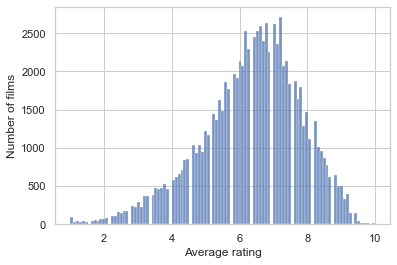

In [286]:
sns.histplot(final_df['averagerating'])
plt.xlabel('Average rating')
plt.ylabel('Number of films');

The histoplot above confirms that there is a normal distribution in movie_ratings as expected, which will allow us to further conduct hypothesis tests on various directors.

### ANALYSIS

Firstly, let us look at the trends in the market. How has the movie  industry been performing over the years?

In [287]:
#creating a function for line plotting different columns

def plot_line(col_name, data_used):
    years = data_used.groupby('year')[col_name].sum().reset_index()

    #visualising the time series
    sns.set_theme(style="whitegrid")
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=years, x='year', y=col_name, marker='o', color = 'red')
    plt.title(f'Year vs {col_name.capitalize()}', fontsize=16)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel(col_name.capitalize(), fontsize=12)
    plt.grid(True)
    plt.show()

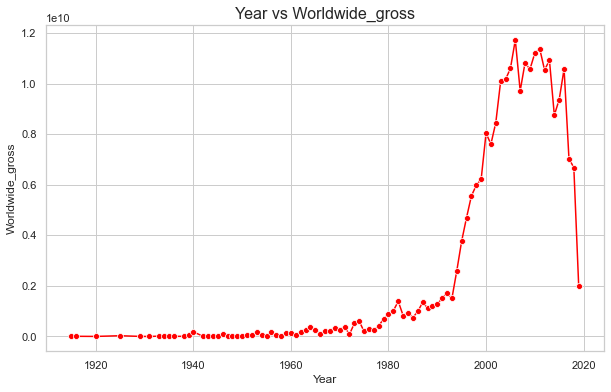

In [288]:
#line plot based on revenue from tnbudgets

plot_line('worldwide_gross',tnbudgets_dfclean)

This trend show that there was a steady growth in revenue through the years and a spike in the early 2000s all the way to pre-2020. There might have been significant movies that were released during this period and advancement in technology such as 3D films. The drop seen before 2020 may be attributed to the pandemic (COVID-19)

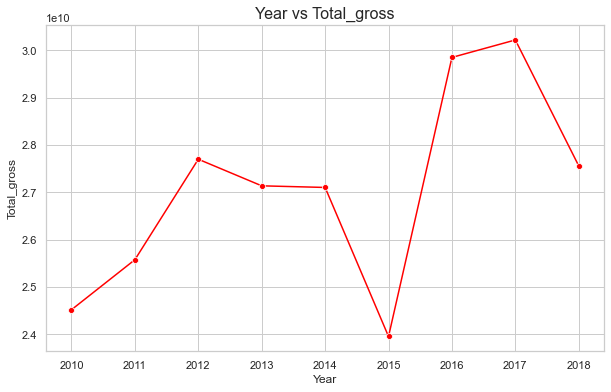

In [289]:
#line plot based on revenue from bom_movies

plot_line('total_gross',bom_movies)

From the above plots, we can observe that the industry has grown increasingly popular from the 1980s through the 21st century. 
This trend shows a rising demand for movies, advancements in production, and the global expansion of the audience base. Let us have a look into the distribution of revenue based on different data.

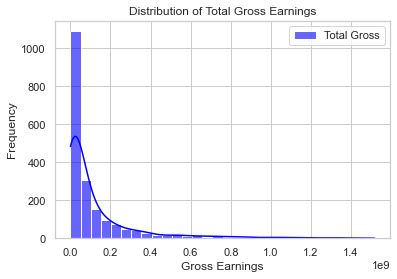

In [290]:
#Distribution of the total gross
sns.histplot(bom_movies['total_gross'], kde=True, color='blue', label='Total Gross', bins=30, alpha=0.6)

# Add labels, title, and legend
plt.legend()
plt.title('Distribution of Total Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Frequency')

# Display the plot
plt.show()

The earnings distributions for both domestic and foreign markets are heavily right-skewed.
This means the majority of movies have lower gross earnings, while a small number of movies achieve very high earnings.

The mode of the distribution is in the 0-50 million range, indicating that most movies fall into this earnings bracket.

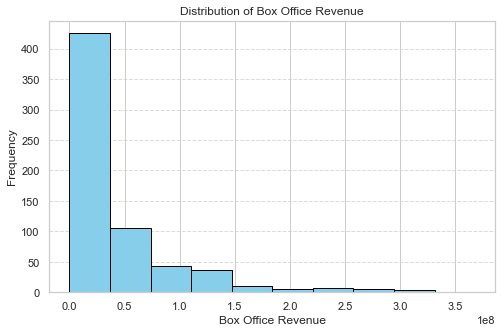

In [291]:
# distribution of box_office revenue from box office
plt.figure(figsize=(8, 5))
plt.hist(rtinfo2['box_office'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Box Office Revenue')
plt.xlabel('Box Office Revenue')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

The above plot points to the same conclusion as the one prior only that it is from a different source.

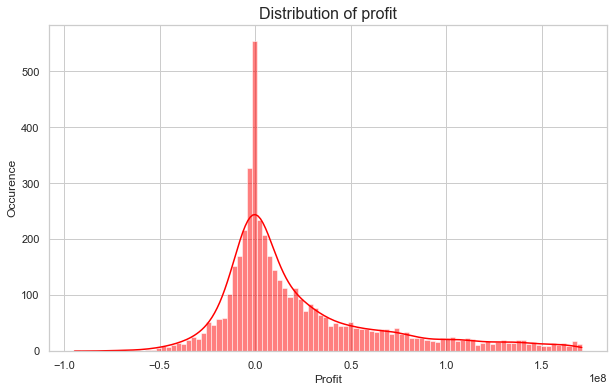

In [292]:
#checking the distribution of profit values using a histogram plot

plt.figure(figsize = (10, 6))
sns.histplot(data=tnbudgets_dfclean, x='profit', bins = 100, color = 'red', kde = True)
plt.title('Distribution of profit', fontsize=16)
plt.xlabel('Profit', fontsize=12)
plt.ylabel('Occurence', fontsize=12)
plt.grid(True)
plt.show()

The distribution appears fairly uniform, though the majority of the values fall toward the right side of the graph. This is a positive indicator as it indicates that more than 50% of movies make profit.

In [293]:
#using median to check for central tendency rather than mean due to the skew;
median_value = np.median(tnbudgets_dfclean['profit'])
median_value

6967251.0

The median profit amount is $6,967,251. This suggests that atleast half of the movies in the dataset are making profits above this value.

In [294]:
# Creating a function to check correlation between different columns
def corre_tmdb(col_1,col_2):
    sns.scatterplot(data=tmdb_df, x=col_1, y=col_2, alpha=0.6)
    plt.title(f'{col_1} vs. {col_2}')
    plt.xlabel(f'{col_1}')
    plt.ylabel(f'{col_2}')
    plt.show()    

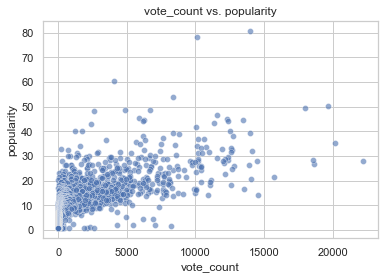

In [295]:
corre_tmdb('vote_count', 'popularity')

From this plot we can see that there is a positive correlation between popularity and vote count.

1. Which genre performs the best at the box office?

Doing and Anova analysis for genre vs box office revenue in order to determine whether there are statistically significant differences in box office performance based on movie genre. This will help identify which genres consistently outperform others.

In [296]:
# this is ANOVA for genre
genres =  rtinfo2['genre'].unique()  
genre_groups = [ rtinfo2[ rtinfo2['genre'] == genre]['box_office'] for genre in genres] 
anova_genre_result = stats.f_oneway(*genre_groups)
print("ANOVA for Genre:")
print("F-statistic:", anova_genre_result.statistic)
print("P-value:", anova_genre_result.pvalue)

#  Result interpretation with print
alpha = 0.05
if anova_genre_result.pvalue < alpha:
    print("\nThere is significant differences in box office revenue across genres.")
else:
    print("\nThere is no significant differences in box office revenue across genres.")


ANOVA for Genre:
F-statistic: 3.918510650681069
P-value: 1.1152346646520713e-07

There is significant differences in box office revenue across genres.


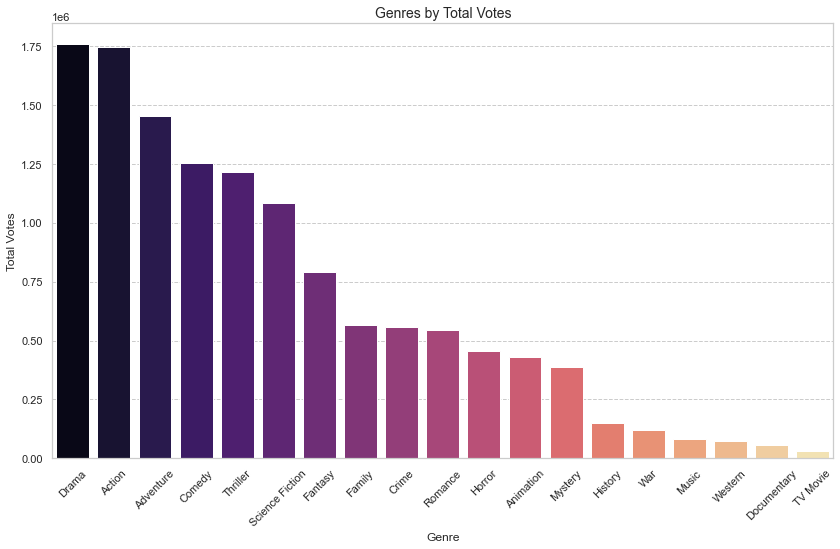

In [297]:
# Spliting the genre_names column to ensure each genre name in a movie gets its own row
tmdb_df_exploded = tmdb_df.explode('genre_names')

# investigating total votes vs genre names using tmdb
genre_analysis = tmdb_df_exploded.groupby('genre_names', as_index=False).agg({'vote_count': 'sum'})

# Sorting genres by total votes
most_voted_genres = genre_analysis.sort_values(by='vote_count', ascending=False)

# Plotting all genres
plt.figure(figsize=(14, 8))
sns.barplot(data=most_voted_genres, x='genre_names', y='vote_count', palette='magma', order=most_voted_genres['genre_names'])

plt.title('Genres by Total Votes', fontsize=14)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Total Votes', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')

From this plot, we can see that Drama, Action and Adventure are the genres that receive the most votes.

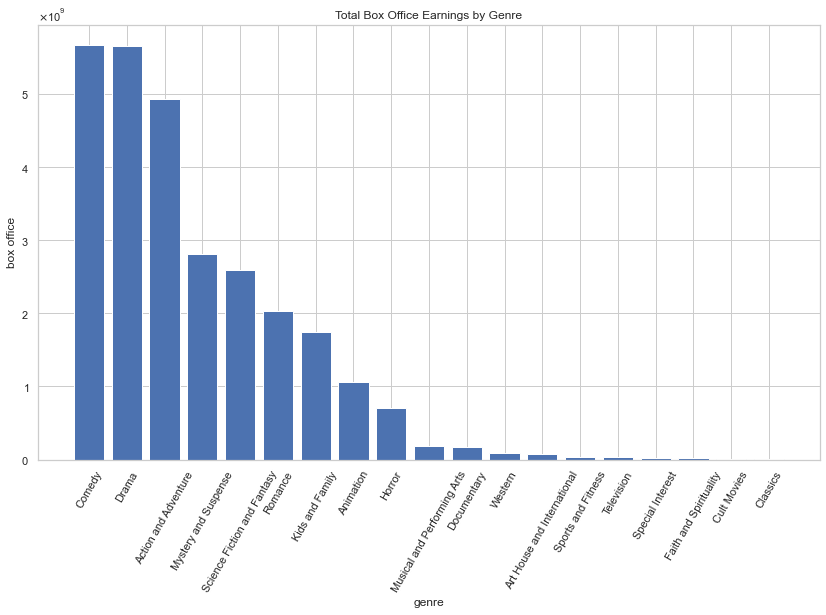

In [298]:
# assessing genre vs box_office revenue from rotten tomatoes
plt.figure(figsize=(14, 8))
plt.bar( genre_revenue['genre'], genre_revenue['box_office'])
plt.title('Total Box Office Earnings by Genre')
plt.xlabel('genre')
plt.ylabel('box office')
plt.xticks(rotation=60)
ax = plt.gca()
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
plt.show()

This plot shows that Comedy, Drama and Action and Adventure bring the highest earnings into the box office, indicating a high commercial appeal.

Both sources indicate that 'Drama,' 'Comedy,' 'Action,' and 'Adventure' are the leading genres in terms of total vote counts and revenue generation. This suggests that focusing on these categories would likely yield the greatest benefits for the client.

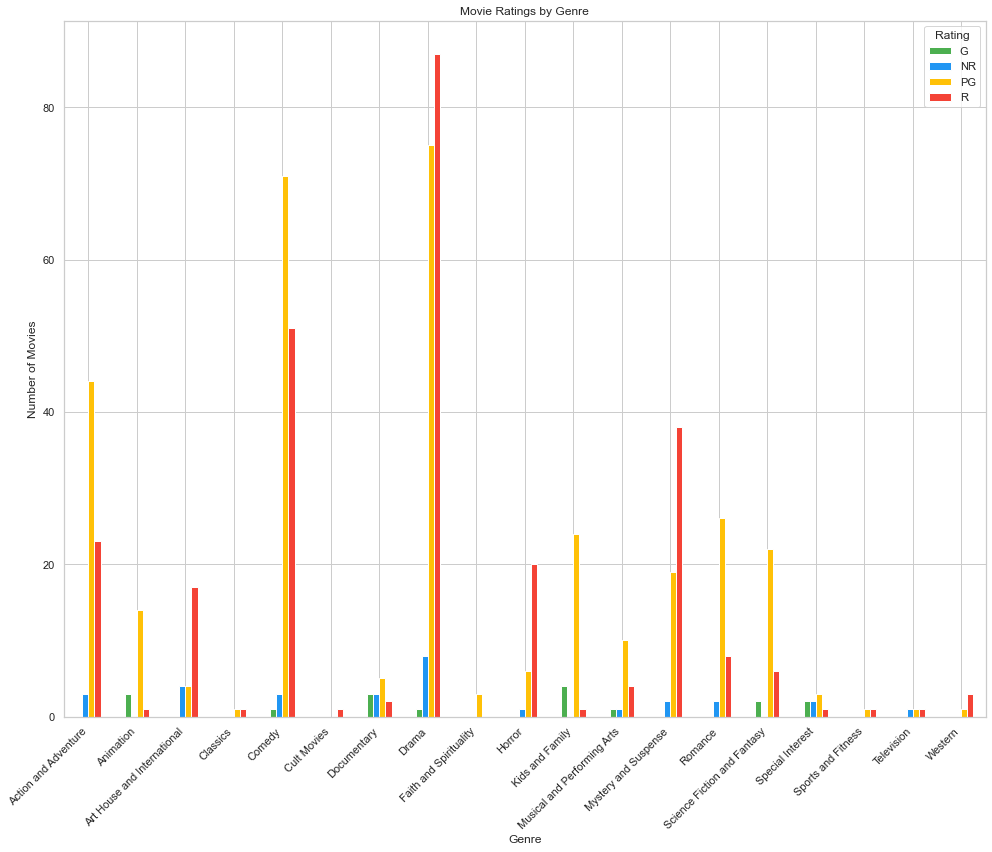

In [299]:
# visualising the spread of ratings per genre
rating_counts = rtinfo2.groupby(['genre', 'rating']).size().unstack(fill_value=0)
rating_counts.plot(kind='bar', stacked=False, figsize=(14, 12), color=['#4CAF50', '#2196F3', '#FFC107', '#F44336'])
plt.title('Movie Ratings by Genre')
plt.xlabel('Genre')
plt.xticks(rotation=90)
plt.ylabel('Number of Movies')
plt.xticks(rotation=45, ha='right')  
plt.legend(title='Rating')
plt.tight_layout()
plt.show()

From this plot, we can see that the Drama and Comedy genres are the most dominant in the industry. It is also evident that PG and R rated movies are most common.

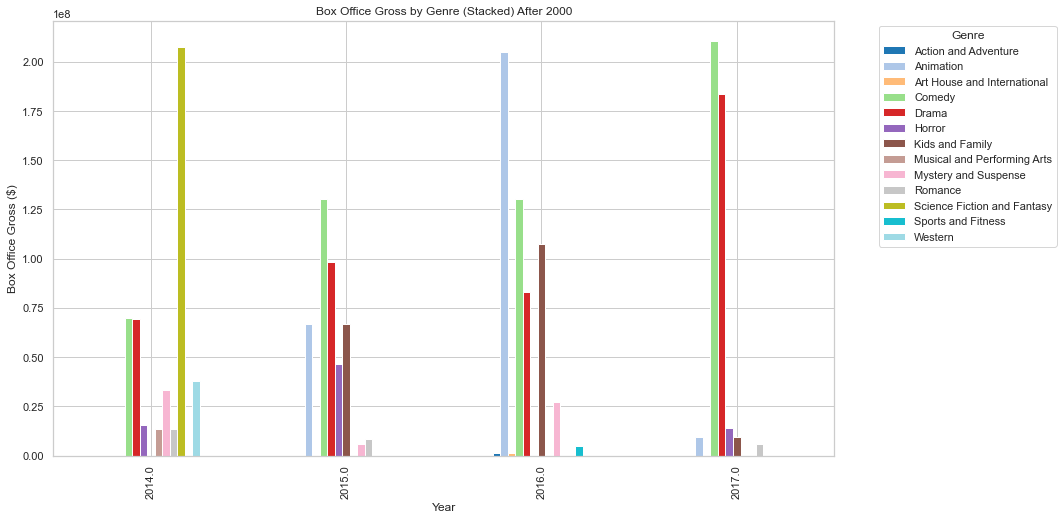

In [300]:
# checking the box office revenue per genre per year
filtered2_df = rtinfo2[rtinfo2['Theatre_Year']>2013]


pivot_df = filtered2_df.pivot_table(
    index='Theatre_Year', columns='genre', values='box_office', aggfunc='sum', fill_value=0
)

pivot_df.plot(kind='bar', stacked=False, figsize=(14, 8), cmap='tab20')

plt.title('Box Office Gross by Genre (Stacked) After 2000')
plt.ylabel('Box Office Gross ($)')
plt.xlabel('Year')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

This plot shows the revenue contributed by each genre from 2014 onwards. We can see Comedy, Animation and Drama appearing among the top over the years.

2. Which studios are the best performing in terms of revenue?


As we did for genre, we can also do an Anova analysis for studio vs. box office revenue in order to determine whether there are statistically significant differences in box office performance based on studios.

In [301]:
# this is ANOVA for studio
studios = rtinfo2['studio'].unique()  
studio_groups = [rtinfo2[rtinfo2['studio'] == studio]['box_office'] for studio in studios]  
anova_studio_result = stats.f_oneway(*studio_groups)
print("\nANOVA for Studio:")
print("F-statistic:", anova_studio_result.statistic)
print("P-value:", anova_studio_result.pvalue)

if anova_studio_result.pvalue < alpha:
    print("There is significant differences in box office revenue across studios.")
else:
    print("There is no significant differences in box office revenue across studios.")


ANOVA for Studio:
F-statistic: 3.08521522742988
P-value: 2.9144104512763624e-18
There is significant differences in box office revenue across studios.


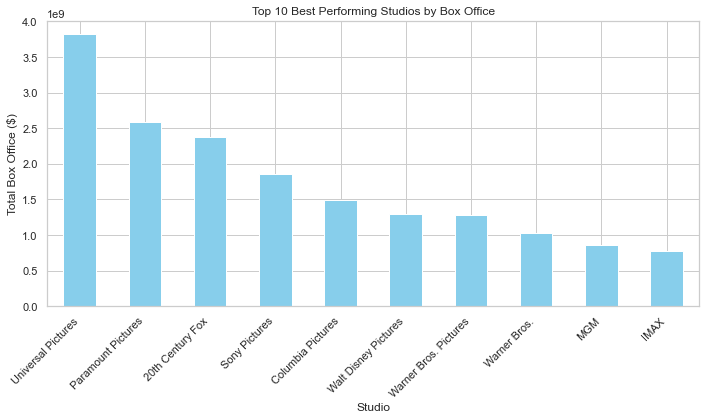

In [302]:
# checking for top 10 performing movie studios on rotten tomatoes
studio_box_office = rtinfo2.groupby('studio')['box_office'].sum().sort_values(ascending=False)
top_10_studios = studio_box_office.head(10)
fig, ax = plt.subplots(figsize=(10, 6))
top_10_studios.plot(kind='bar', ax=ax, color='skyblue')
ax.set_title('Top 10 Best Performing Studios by Box Office')
ax.set_xlabel('Studio')
ax.set_ylabel('Total Box Office ($)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

From the above plot, we can see that Universal Pictures, Paramount Pictures and 20th Century Fox are the best performing studio in the box office in terms of total box office revenue.

         domestic_gross  foreign_gross   total_gross
studio                                              
BV         1.839653e+10   2.579385e+10  4.419038e+10
Fox        1.092450e+10   2.005587e+10  3.098037e+10
WB         1.212360e+10   1.866790e+10  3.079150e+10
Uni.       1.289204e+10   1.685477e+10  2.974681e+10
Sony       8.459479e+09   1.394524e+10  2.240472e+10
Par.       7.580813e+09   1.186338e+10  1.944420e+10
WB (NL)    3.975100e+09   6.339000e+09  1.031410e+10
LGF        3.991851e+09   4.475619e+09  8.467471e+09
LG/S       1.965200e+09   3.353724e+09  5.318924e+09
P/DW       1.682900e+09   3.393600e+09  5.076500e+09


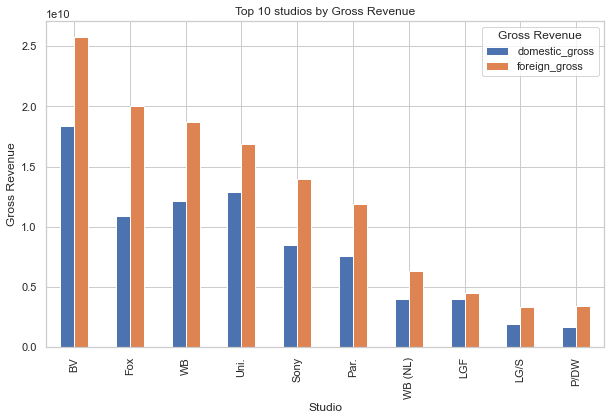

In [303]:
#Top studio acccording to the revenue generated from bom movies
studio_performance = bom_movies.groupby('studio')[['domestic_gross', 'foreign_gross']].sum()

#Top 10 studios by total gross revenue
studio_performance['total_gross'] = studio_performance['domestic_gross'] + studio_performance['foreign_gross']
top_studios = studio_performance.sort_values(by='total_gross', ascending=False).head(10)
print(top_studios)

#Plotting a stacked bar chart
top_studios[['domestic_gross', 'foreign_gross']].plot(kind='bar', stacked=False, figsize=(10,6))
plt.title('Top 10 studios by Gross Revenue')
plt.xlabel('Studio')
plt.ylabel('Gross Revenue')
plt.legend(title='Gross Revenue')
plt.show()

From the above plot, BV, Fox and Warners Bros are the top performing in terms of gross revenue. We can also see that foreign gross significantly drives revenue for studios. 
The head of the company's new movies studio should ensure the studio invests in globally appealing content so as earn more reveunue. The client can also consider collaborations with successful studios. 

3. What role does the foreign market play in the industry's overall performance?


To answer this, first let us compare the difference in the domestic and gross revenue

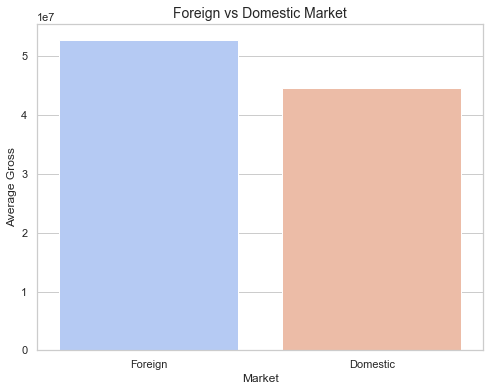

In [304]:
#visualising the comparison between the domestic and foreign market

average_foreign = tnbudgets_df['foreign_gross'].mean()
average_domestic = tnbudgets_df['domestic_gross'].mean()

#creating a dataframe for the purposes of plotting
avg_data = pd.DataFrame({
    'Market': ['Foreign', 'Domestic'],
    'Average Gross': [average_foreign, average_domestic]
})

#plotting
plt.figure(figsize=(8, 6))
sns.barplot(data=avg_data, x='Market', y='Average Gross', palette = 'coolwarm',)
plt.title('Foreign vs Domestic Market', fontsize=14)
plt.xlabel('Market', fontsize=12)
plt.ylabel('Average Gross', fontsize=12)
plt.show()

The above bar plot shows that the foreign market average gross revenue is about $53,000,000 and the domestic market comes to about $45,000,000. This shows that the foreign market contributes more to the industry. However, it is also noted that the domestic market contributes significantly to the success of the movies thus success in the domestic market leads to further success in the foreign market.

In [305]:
# what percentage is the revenue from the foreign market?
tnbudgets_df['foreign_gross'].sum()/ tnbudgets_df['worldwide_gross'].sum() * 100

55.066153183755596

From the above, we can clearly see that the foreign market is a great contributer in the industry. To solidify our deduction of expansion of the audience base over the years leading to the rising trend in performance for the industry, let us see how the foreign markert has evolved over the years using a line plot

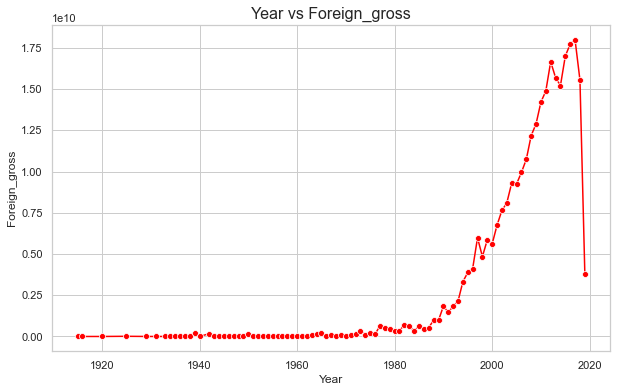

In [306]:
#lineplot of foreign_gross vs year

plot_line('foreign_gross', tnbudgets_df)

The rising trend in the foreign gross shows growth and expansion of the audience base for the industry over the years. Let us look at a time series analysis of how domestic gross, foreign gross and the total gross have changed overtime by year of production.

In [307]:
#Looking at the yearly trends since 2010 - 2018

yearly_trends = bom_movies.groupby('year').agg({
    'domestic_gross': 'sum',  
    'foreign_gross': 'sum',  
    'title': 'count'         
}).rename(columns={'title': 'movie_count'}).reset_index()
yearly_trends

,year,domestic_gross,foreign_gross,movie_count
0,2010,1.015274e+10,1.436937e+10,308
1,2011,9.915690e+09,1.566287e+10,290
2,2012,1.069786e+10,1.700298e+10,243
3,2013,1.055885e+10,1.658024e+10,200
4,2014,1.014798e+10,1.695667e+10,234
5,2015,1.074487e+10,1.515435e+10,190
6,2016,1.086969e+10,1.898139e+10,192
7,2017,1.051677e+10,1.992893e+10,177
8,2018,1.076436e+10,1.747449e+10,173


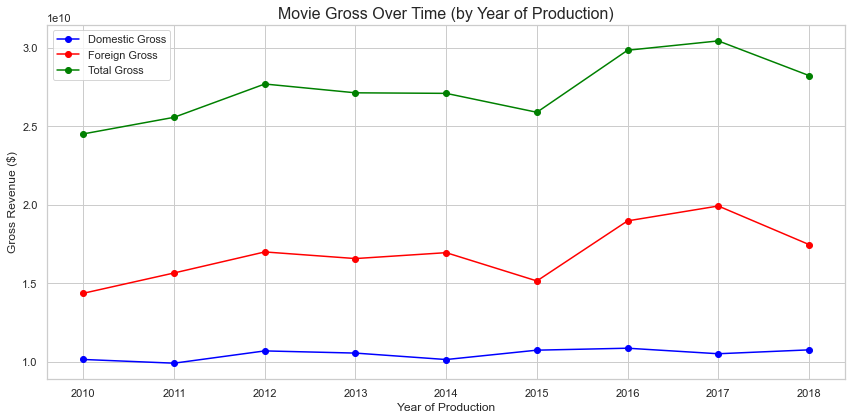

In [308]:
# Year_of_production and sum the domestic and foreign grosses
yearly_gross = bom_movies.groupby('year')[['domestic_gross', 'foreign_gross']].sum()


yearly_gross['total_gross'] = yearly_gross['domestic_gross'] + yearly_gross['foreign_gross']


# Plotting the time series for domestic, foreign, and total gross
plt.figure(figsize=(12, 6))

plt.plot(yearly_gross.index, yearly_gross['domestic_gross'], label='Domestic Gross', color='blue', marker='o')
plt.plot(yearly_gross.index, yearly_gross['foreign_gross'], label='Foreign Gross', color='red', marker='o')
plt.plot(yearly_gross.index, yearly_gross['total_gross'], label='Total Gross', color='green', marker='o')

plt.title('Movie Gross Over Time (by Year of Production)', fontsize=16)
plt.xlabel('Year of Production', fontsize=12)
plt.ylabel('Gross Revenue ($)', fontsize=12)
plt.legend()

plt.grid(True)
plt.tight_layout()
plt.show()


This time series shows that there is minimal to no volatility in the industry thus showing this is a relatively safe investment. 

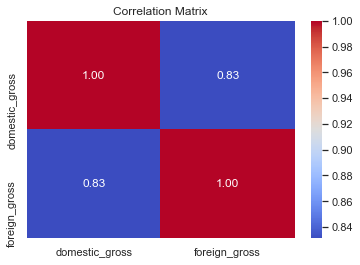

In [309]:
#Correlation plot
numerical_columns = ['domestic_gross', 'foreign_gross']
sns.heatmap(bom_movies[numerical_columns].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

The correlation between domestic_gross and foreign gross is 0.831178. This value is positive, meaning that as the domestic gross increases, the foreign gross also tends to increase, and vice versa.
The value of 0.831178 indicates a strong positive correlation. This would suggest that the domestic gross and foreign gross are strongly related to each other, and movies that perform well domestically also tend to perform well in foreign markets.

If we know the domestic gross of a movie, we can reasonably predict its foreign gross to some extent, given the strong correlation. However, the correlation is not perfect, so there are other factors that might influence the foreign gross such as the genre of the movie, country of production and even marketing efforts.

From the above analysis, foreign earnings tend to be higher than domestic earnings for most movies. The new studio should focus on producing globally appealing films with high foreign revenue potential.

4. Is there a positive correlation between production budget and years?

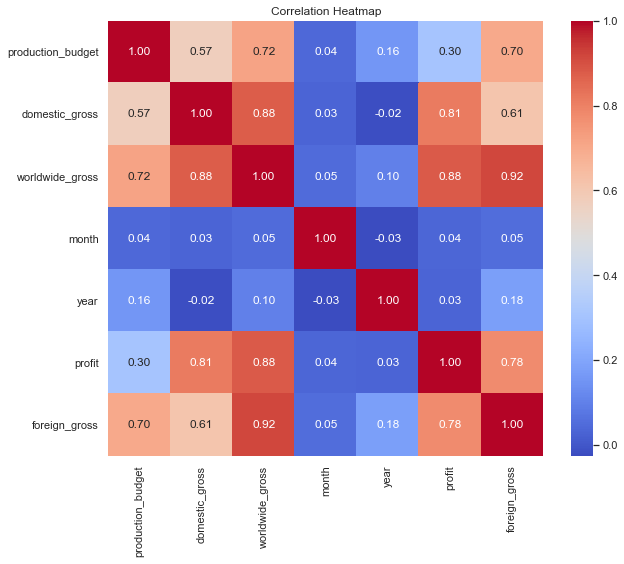

In [310]:
#using a heatmap to check the correlation between columns

#plotting
plt.figure(figsize=(10, 8))
sns.heatmap(tnbudgets_dfclean.corr(), annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title('Correlation Heatmap')
plt.show()


It is evident that gross revenue is strongly correlated with the production budget. To explore this further, let's first examine how production budgets have evolved over the years.

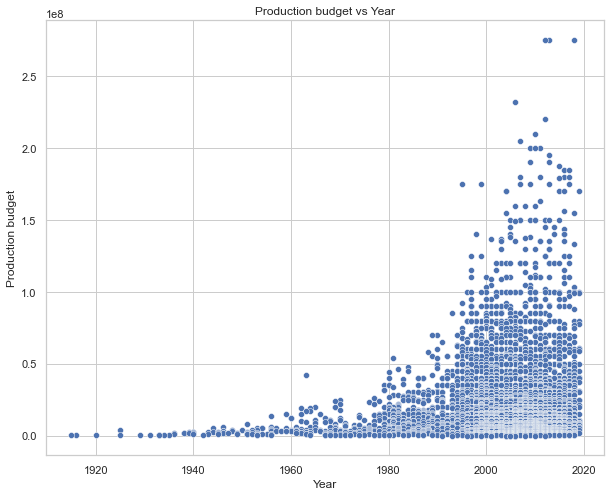

In [311]:
#visualising this correlation using a scatter plot

plt.figure(figsize=(10, 8))

# Scatter plot
sns.scatterplot(x=tnbudgets_dfclean['year'], y=tnbudgets_df['production_budget'])

# Labels and Title
plt.xlabel("Year")
plt.ylabel("Production budget")
plt.title("Production budget vs Year")

# Show the plot
plt.show()

We can clearly see that the production budget has been increasing over the years. This is may be because of the demand for high-quality visual effects. With this insight, we can ask: Do higher production budgets result in higher revenue? Have the majority of movies with a high production budget accrued good revenue? Using a linear regression, we can be able to determine how much variance in the revenue can be accredited to the production budget.

In [312]:
#creating a function for doing regressions

def regression(a,b):
#defining variables

    X = tnbudgets_dfclean[a]
    y = tnbudgets_dfclean[b]

    #adding constant

    model = sm.OLS(endog = y, exog = sm.add_constant(X))

    #fitting

    results = model.fit()

    #evaluation of the results
    print(results.summary())

In [313]:
#regression between production_budget and r_o_i
regression(['production_budget'], 'worldwide_gross')

                            OLS Regression Results                            
Dep. Variable:        worldwide_gross   R-squared:                       0.513
Model:                            OLS   Adj. R-squared:                  0.513
Method:                 Least Squares   F-statistic:                     5081.
Date:                Sun, 26 Jan 2025   Prob (F-statistic):               0.00
Time:                        21:01:39   Log-Likelihood:                -91518.
No. Observations:                4822   AIC:                         1.830e+05
Df Residuals:                    4820   BIC:                         1.831e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.233e+07   8.02e+0

Interpretation of the simple regression:
1. R-squared = 0.513 meaning that the variance of the revenue can be explained by the production budget 51% of the time. 
2. p-value =  0.00 which is less than 0.05 meaning that the model is statistically significant.
3. constant = 1.233e+07 means that when production budget is 0, estimated value of the revenue is 1.233e+07
4. coef = 1.4521 suggests that for every unit increase in the production budget, revenue increases by 1.4521 units.

The model confirms that higher production budgets are associated with higher worldwide gross revenues. On average, every dollar spent on production results in an additional $1.4521 in gross revenue.

5. What is the optimal time of year to release a movie for maximum success?
To answer this, we can check whether there are specific high seasons throughout the year for this industry. 


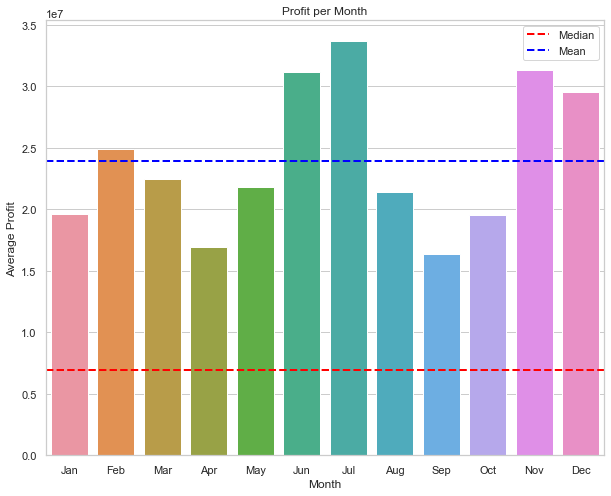

In [314]:
#grouping profit into months
profit_per_month = tnbudgets_dfclean.groupby('month')['profit'].mean().reset_index()

plt.figure(figsize=(10, 8))

# Bar plot
sns.barplot(x=profit_per_month['month'], y=profit_per_month['profit'])

# Labels and Title
plt.xlabel("Month")
plt.ylabel("Average Profit")
plt.title("Profit per Month")
plt.xticks(ticks=range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

#adding the line of central tendency
mean_value = np.mean(tnbudgets_dfclean['profit'])
plt.axhline(median_value, color='red', linestyle='dashed', linewidth=2, label = 'Median')
plt.axhline(mean_value, color='blue', linestyle='dashed', linewidth=2, label = 'Mean')
plt.legend()

# Show the plot
plt.show()


The industry appears to perform better than average in mid year, that is June and July, and end year in November and December. Therefore, it may be advisable for the client to schedule their release dates during these months to maximize potential returns.

6. Do certain languages have a broader audience reach?

In [315]:
#checking the 20 most used languages in movies
language_counts = tmdb_df['original_language'].value_counts().head(20)
print(language_counts)

en    20043
fr      472
es      410
ru      290
ja      239
de      223
hi      168
zh      167
it      107
ko       91
pt       87
sv       65
da       51
pl       49
cn       47
no       46
nl       44
th       37
he       35
ar       30
Name: original_language, dtype: int64


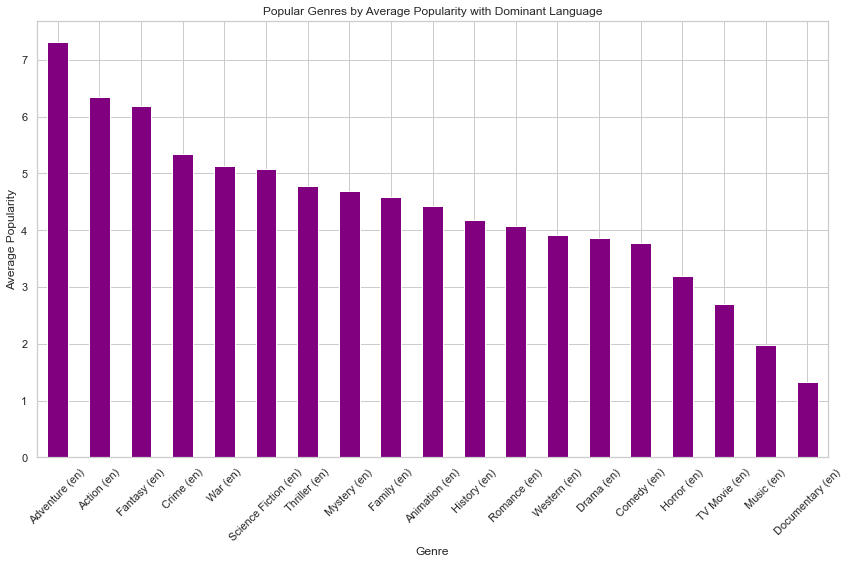

In [316]:
# creating a variable to hold genre_names
genre_insights = tmdb_df_exploded.groupby('genre_names').agg(
    average_popularity=('popularity', 'mean'),
    dominant_language=('original_language', lambda x: x.mode()[0])
).sort_values(by='average_popularity', ascending=False)

# Plotting the data
plt.figure(figsize=(12, 8))
genre_insights['average_popularity'].plot.bar(color='purple')
plt.title('Popular Genres by Average Popularity with Dominant Language')
plt.xlabel('Genre')
plt.ylabel('Average Popularity')
plt.xticks(range(len(genre_insights)), [f"{genre} ({lang})" for genre, lang in zip(genre_insights.index, genre_insights['dominant_language'])], rotation=45)
plt.tight_layout()
plt.show()

Based on the dominant language, English, adventure movies have a higher popularity compared to other genres

7. Who are the top-performing directors and writers in the industry?

7a. Who are the best performing writers

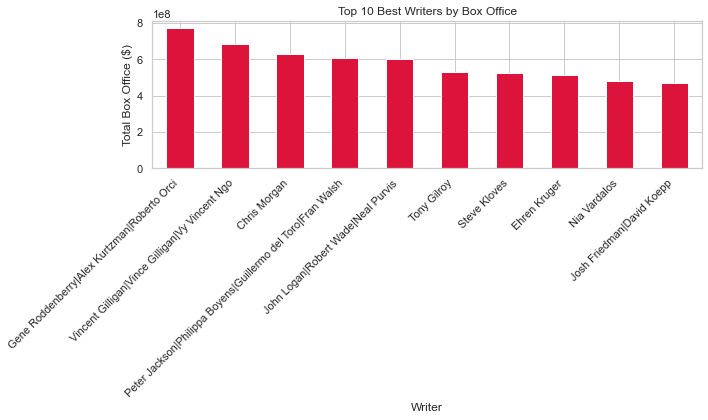

In [317]:
writer_box_office = rtinfo2.groupby('writer')['box_office'].sum().sort_values(ascending=False)
top_10_writers= writer_box_office.head(10)
fig, ax = plt.subplots(figsize=(10, 6))
top_10_writers.plot(kind='bar', ax=ax, color='#DC143C')
ax.set_title('Top 10 Best Writers by Box Office')
ax.set_xlabel('Writer')
ax.set_ylabel('Total Box Office ($)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Gene Roddenberry, Vincent Gilligan and Chris Morgan are the highest grossing lead writers.

7b. Who are the best performing directors

Let's pick out the directors with the most movies

In [318]:
xi = pd.Series(final_df['primary_name'].value_counts().head(20))
for i,k in xi.items():
    print(i,final_df[final_df['primary_name']==f'{i}'].isna().sum())

Omer Pasha movie_id            0
primary_title       0
start_year          0
runtime_minutes     0
genres              0
averagerating      60
numvotes           60
person_id           0
primary_name        0
dtype: int64
Larry Rosen movie_id            0
primary_title       0
start_year          0
runtime_minutes     0
genres              0
averagerating      19
numvotes           19
person_id           0
primary_name        0
dtype: int64
Rajiv Chilaka movie_id            0
primary_title       0
start_year          0
runtime_minutes     0
genres              0
averagerating      37
numvotes           37
person_id           0
primary_name        0
dtype: int64
Stephan Düfel movie_id            0
primary_title       0
start_year          0
runtime_minutes     0
genres              0
averagerating      47
numvotes           47
person_id           0
primary_name        0
dtype: int64
Graeme Duane movie_id            0
primary_title       0
start_year          0
runtime_minutes     0
genr

In [319]:
# We shall pull samples for 3 directors, 3 with no blank ratings(Sergey A. , Paul T.T. Easter , David DeCoteau) 
# Using the above names we shall conduct hypothesis tests to establish whether these directors perfom significantly better at Alpha = 0.05

Ho1 = 'Director performance is normal'

Ha1 = 'Director perfomance is above average' 

In [320]:
mu = final_df['averagerating'].mean()
std = final_df['averagerating'].std()
alpha = 0.05
print(mu, std)

6.338266144171203 1.4750511088535363


1. Sergey



In [321]:
#Sergey A. hypothesis 
sergey_a = final_df[final_df['primary_name']=='Sergey A.']

Ho1 = Sergey ratings are normal

Ha1 = Sergey ratings are better

In [322]:
t_statistic, p_value = stats.ttest_1samp(a=sergey_a['averagerating'], popmean=6.33) 
print(t_statistic , p_value)

7.134987766901874 1.616225344726199e-08


We reject the null. Based on the p-value generated we shall recommend working with Sergey

2. Paul T.T. Easter 

In [323]:
#Paul T.T. Easter hypothesis 
paul_t = final_df[final_df['primary_name']=='Paul T.T. Easter']

Ho2 = Paul T.T. Easter ratings are normal.

Ha2 = Paul T.T. Easter ratings are better. 

In [324]:
t_statistic, p_value = stats.ttest_1samp(a=paul_t['averagerating'], popmean=6.33) 
print(t_statistic , p_value)

-16.871460859285637 7.235729552707125e-16


We reject the null. Based on the p value, Paul perfoms better than the population

3. David DeCoteau

In [325]:
david_decoteau = final_df[final_df['primary_name']=='David DeCoteau']

Ho3 = David DeCoteau ratings are normal

Ha3 = David DeCoteau ratings are better

In [326]:
t_statistic, p_value = stats.ttest_1samp(a=david_decoteau['averagerating'], popmean=6.33) 
print(t_statistic , p_value)

-14.376144076855885 6.93459619144652e-14


We reject the null. David DeCoteau ratings are better. 

We shall do a pair wise test against our 3 directors to rank them in order of preference

Ho: the directors perform the same

Ha : the directors are different in performance


Sergey vs Paul

In [327]:
stats.ttest_ind(a=sergey_a['averagerating'], b=paul_t['averagerating'], equal_var=True)

Ttest_indResult(statistic=17.38128792235194, pvalue=3.968110862350945e-26)

From the above, Sergey performs differently and better.

David vs Paul

In [328]:
stats.ttest_ind(a=david_decoteau['averagerating'], b=paul_t['averagerating'], equal_var=True)

Ttest_indResult(statistic=0.4206511781421125, pvalue=0.6757106100680254)

From the above the performance of David and Paul are similar

In [329]:
#to confirm and view the means

paul_t['averagerating'].mean(), sergey_a['averagerating'].mean(), david_decoteau['averagerating'].mean()

(3.285714285714286, 7.44102564102564, 3.4)

CONCLUSIONS

1. Based on the analysis, the most profitable genres are Drama, Comedy, Action, and Adventure.  

2. Universal Studios, BV, and Sony are the top-performing studios. It is recommended that the client benchmark or collaborate with these studios to enhance their market presence.  

3. The foreign market contributes approximately 55% of the industry's total revenue. Therefore, the client should highly consider the foreign market when planning and producing movies to maximize revenue potential.  

4. For every dollar spent on production, an additional $1.4521 in gross revenue is generated. This highlights the importance of investing strategically in production budgets.  

5. Movies released mid-year (June and July) and end-year (November and December) generate the highest revenue. It is advisable for the client to schedule movie releases during these months to capitalize on peak performance periods.  

6. English is the dominant language in the movie industry, reaching the widest audience base compared to other languages. The client should consider producing movies primarily in English to maximize global reach and appeal.  

7. a.) Gene Roddenberry, Vincent Gilligan, and Chris Morgan are among the top writers in the industry. The client is encouraged to explore hiring them for movie projects to ensure high-quality storytelling.  

   b.) Among the producers analyzed, Sergey stands out as the best performer. The difference between David and Paul is negligible, meaning selecting either one would likely yield similar results in movie performance.